# Fundamentos de estadística para Analítica de Datos





# Variables aletorias

1. Vamos a lanzar 16 monedas y construir la variable aleatoria:
$$X_{16}=\text{número de caras}$$

* ¿Que valores posibles tiene $X_{16}$?
* ¿Cuál es la probabilidad de cada uno de esos valores?

2. Lancemos una vez las 16 monedas

3. Vamos a simular este procedimiento, ¿Qué es un número pseudoaleatorio?

In [ ]:
from random import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
random()

0.6753332039111861

In [ ]:
monedas = 16
caras = 0
for ii in range(monedas):
  if random()<0.5:
    caras = caras +1
caras

8

### Semilla
1. Los número simulados no son aleatorios propiamente, son pseudo-aleatorios

In [ ]:
from random import seed

## Ya no es aleatorio!!

seed(100)
monedas = 16
caras = 0
for ii in range(monedas):
  if random()<0.5:
    caras = caras +1
caras

8

1. Repitamos el lanzamiento de 16 monedas 100 veces

In [ ]:
nsimulaciones = 100
resultado = []
monedas = 16
for lanzamiento in range(nsimulaciones):
  caras = 0
  for ii in range(monedas):
    if random()<0.5:
      caras = caras +1
  resultado.append(caras)
resultado = pd.DataFrame({"simulacion":range(nsimulaciones), "caras":resultado})
resultado

,simulacion,caras
0,0,10
1,1,7
2,2,4
3,3,9
4,4,8
...,...,...
95,95,9
96,96,9
97,97,10
98,98,7


In [ ]:
conteo = resultado.groupby("caras", as_index=False).size()
conteo["Frecuencia"] = conteo["size"]/nsimulaciones
conteo

,caras,size,Frecuencia
0,3,1,0.01
1,4,2,0.02
2,5,8,0.08
3,6,14,0.14
4,7,12,0.12
5,8,22,0.22
6,9,19,0.19
7,10,14,0.14
8,11,7,0.07
9,12,1,0.01


## Y si lo hago 10000 veces

In [ ]:
nsimulaciones = 1000000
resultado = []
monedas = 16
for lanzamiento in range(nsimulaciones):
  caras = 0
  for ii in range(monedas):
    if random()<0.5:
      caras = caras +1
  resultado.append(caras)
resultado = pd.DataFrame({"simulacion":range(nsimulaciones), "caras":resultado})
conteo = resultado.groupby("caras", as_index=False).size()
conteo["Frecuencia"] = conteo["size"]/nsimulaciones
conteo

,caras,size,Frecuencia
0,0,21,0.000021
1,1,236,0.000236
2,2,1755,0.001755
3,3,8480,0.008480
4,4,27915,0.027915
5,5,66739,0.066739
6,6,122787,0.122787
7,7,174593,0.174593
8,8,196486,0.196486
9,9,174562,0.174562


In [ ]:
import plotly.express as px
fig = px.bar(conteo, x="caras", y="Frecuencia")
fig.show()

In [ ]:
nsimulaciones = 100000
resultado = []
monedas = 16
for lanzamiento in range(nsimulaciones):
  caras = 0
  for ii in range(monedas):
    if random()<0.5:
      caras = caras +1
  resultado.append(caras)
resultado = pd.DataFrame({"simulacion":range(nsimulaciones), "caras":resultado})
conteo = resultado.groupby("caras", as_index=False).size()
conteo["Frecuencia"] = conteo["size"]/nsimulaciones
conteo

,caras,size,Frecuencia
0,1,26,0.00026
1,2,167,0.00167
2,3,899,0.00899
3,4,2866,0.02866
4,5,6595,0.06595
5,6,12292,0.12292
6,7,17473,0.17473
7,8,19498,0.19498
8,9,17393,0.17393
9,10,12161,0.12161


## Variable aleatoria

1. En probabilidad y estadística, una variable aleatoria es una función que asigna un valor al resultado de un experimento aleatorio.

2. Pueden ser variables aleatorias o discretas


### Variable aleatoria discreta

1. El rango de la variable es un conjunto discreto, (finito o infinito contable), para mayor facilidad diremos "Números enteros".

2. Poseen una función $f_X(x)$ que cumple:
* $$f_X(x) >= 0 \text{   } ∀x$$
* $$\sum_{x} f_X(x) =1$$

3. Se define su experanza matemática como:
$$\mu_X = \sum_{x}xf_X(x)$$

3. Se define su varianza matemática como:
$$\sigma^2_X = \sum_{x}(x-\mu_X)^2f_X(x)$$

##  Distribucion binomial

La distribución binomial de probabilidad es una distribución de probabilidad discreta que describe el número de veces que un evento ocurre en una serie de ensayos independientes y idénticos, donde cada ensayo tiene solo dos posibles resultados: éxito o fracaso.

En una distribución binomial, el parámetro "n" representa el número total de ensayos y el parámetro "p" representa la probabilidad de éxito en cada ensayo. La función de masa de probabilidad de una distribución binomial da la probabilidad de obtener exactamente "x" éxitos en "n" ensayos. La fórmula de la distribución binomial es:

$$P(X = x) = {n\choose x} \times p^x \times (1-p)^{n-x}$$

Donde:

1. P(X = x) es la probabilidad de que haya exactamente "x" éxitos.
2. n es el número total de ensayos.
3. p es la probabilidad de éxito en cada ensayo.
4. (nCx) es el coeficiente binomial que representa el número de formas en que se pueden seleccionar "x" éxitos de "n" ensayos.
5. p^x es la probabilidad de tener "x" éxitos.
6. (1-p)^(n-x) es la probabilidad de tener "n-x" fracasos.
La distribución binomial se utiliza comúnmente en áreas como la estadística, la investigación de operaciones y la psicología para modelar eventos binarios como el éxito o el fracaso, la vida o la muerte, y así sucesivamente.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

#### Ejemplo

1. Un examen de selección múltiple consta de 15 preguntas, cada una con 4 opciones de respuesta de única respuesta correcta. Un estudiante contesta el examen totalmente al azar.

Calcular:
1.  La probabilidad de sacar menos de 6 respuestas correctas.
2. La probabilidad de 12 respuestas correctas
3. Sacar 8 respuestas correctas o menos
4. La probabilidad de pasar el examen. (9 respuestas correctas)


In [ ]:
from scipy.stats import binom

In [ ]:
binom.stats(15, 0.25, moments='mvsk')

(3.75, 2.8125, 0.29814239699997197, -0.044444444444444446)

### Parametros

1. $n$="Número de experimentos"
2. $p$="Probabilidad de exito"
3. $\mu=E(X)=np$
4. $\sigma^2 = Var(X)= np(1-p)$


In [ ]:
binom.pmf(k=0,n=15, p=0.25)

0.013363461010158062

In [ ]:
binom.pmf(k=range(15),n=15, p=0.25)

array([1.33634610e-02, 6.68173051e-02, 1.55907045e-01, 2.25199065e-01,
       2.25199065e-01, 1.65145981e-01, 9.17477673e-02, 3.93204717e-02,
       1.31068239e-02, 3.39806546e-03, 6.79613091e-04, 1.02971680e-04,
       1.14412978e-05, 8.80099833e-07, 4.19095159e-08])

In [ ]:
probabilidades = pd.DataFrame({"correctas" :range(16), "prob": binom.pmf(k=range(16),n=15, p=0.25)})
probabilidades

,correctas,prob
0,0,1.336346e-02
1,1,6.681731e-02
2,2,1.559070e-01
3,3,2.251991e-01
4,4,2.251991e-01
5,5,1.651460e-01
6,6,9.174777e-02
7,7,3.932047e-02
8,8,1.310682e-02
9,9,3.398065e-03


In [ ]:
fig = px.bar(probabilidades, x="correctas", y="prob")
fig.show()

In [ ]:
binom.cdf(8,15, 0.25)

0.9958069855347276

##  Distribución de Poisson

La distribución de Poisson es una distribución de probabilidad discreta que se utiliza para modelar el número de ocurrencias de un evento en un intervalo de tiempo o en un espacio determinado, cuando la tasa media de ocurrencia es conocida y es constante en todo el intervalo o espacio.

Por ejemplo, la distribución de Poisson se puede utilizar para modelar el número de llamadas que llegan a un centro de atención telefónica en un intervalo de tiempo determinado, o el número de accidentes de tráfico que ocurren en una carretera en un día determinado.

La distribución de Poisson se caracteriza por un solo parámetro, "λ", que representa la tasa media de ocurrencia del evento en el intervalo de tiempo o espacio. La función de masa de probabilidad de la distribución de Poisson da la probabilidad de que ocurra un número específico de eventos durante un intervalo de tiempo o en un espacio determinado, y se puede expresar mediante la siguiente fórmula:

$$P(X = k) = (e^{-λ} * λ^k) / k!$$

Donde:

1. P(X = k) es la probabilidad de que ocurran exactamente "k" eventos.
3. λ es la tasa media de ocurrencia del evento en el intervalo de tiempo o espacio.
4. k es el número de eventos que se espera que ocurran.
5. k! es el factorial de "k".
La distribución de Poisson se utiliza comúnmente en áreas como la estadística, la ingeniería, la física, la biología, la economía y la demografía para modelar eventos que ocurren de manera aleatoria y cuya tasa media de ocurrencia es conocida.

## Distribución normal

La distribución normal, también conocida como distribución gaussiana, es una distribución de probabilidad continua que se utiliza ampliamente en estadística y en muchos campos científicos para modelar la variabilidad de una variable continua.

La distribución normal se caracteriza por dos parámetros: la media (μ) y la desviación estándar (σ). Su función de densidad de probabilidad es una curva en forma de campana simétrica alrededor de la media, donde la altura de la curva en cada punto representa la probabilidad de que la variable tome ese valor.

La distribución normal tiene varias propiedades importantes, como la regla empírica, que establece que aproximadamente el 68% de los valores se encuentran dentro de una desviación estándar de la media, el 95% se encuentran dentro de dos desviaciones estándar de la media y el 99.7% se encuentran dentro de tres desviaciones estándar de la media.

La distribución normal es ampliamente utilizada en la estadística inferencial para modelar la variabilidad en datos de muestra, para realizar pruebas de hipótesis, para construir intervalos de confianza, para ajustar modelos de regresión, entre otros. También se utiliza en muchos campos científicos para modelar fenómenos naturales y sociales, como la altura de los individuos, la temperatura, los tiempos de espera, las notas de los exámenes, entre otros.


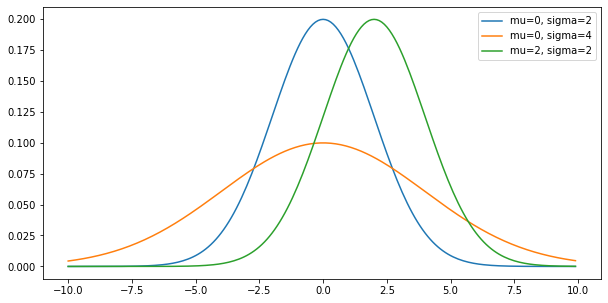

In [ ]:
from scipy.stats import norm
x = np.arange(-10, 10, 0.1)

y1 = norm.pdf(x, 0, 2)
y2 = norm.pdf(x, 0, 4)
y3 = norm.pdf(x, 2, 2)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=0, sigma=2" )
plt.plot(x, y2, label="mu=0, sigma=4" )
plt.plot(x, y3, label="mu=2, sigma=2" )
plt.legend()
plt.show()

### Percentiles en la normal


In [ ]:
norm.ppf(0.95,0,1)

1.6448536269514722

In [ ]:
norm.ppf(0.975,0,1)

1.959963984540054

## Ejemplos con la normal

1. Suponga que el contenido de aceite en una botella de un litro sigue una distribución normal con media 1000 ml y desviación estandar 3 ml (Varianza $(3ml)^2=9 ml^2$.

Calcular
¿Cuál es la probabilidad de comprar una botella y que tenga menos de 998 ml?

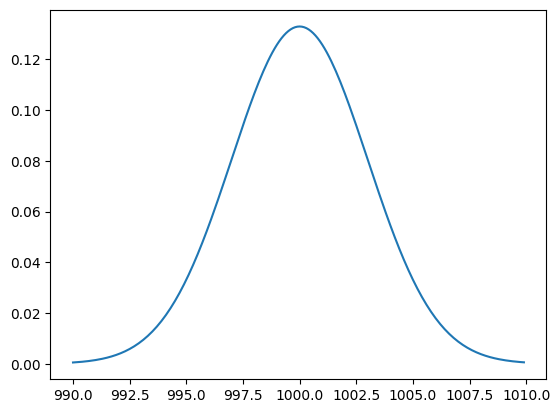

In [ ]:
from scipy.stats import norm
x = np.arange(990, 1010, 0.1)

y1 = norm.pdf(x, 1000, 3)
plt.plot(x, y1, label="mu=1000, sigma=3" )

In [ ]:
## ¿Cuál es la probabilidad de comprar una botella y que tenga menos de 998 ml?
norm.cdf(998, 1000, 3)

0.2524925375469229

In [ ]:
## Cual es la probabilidad que una botella tenga más de 1010 ml
norm.cdf(1010, 1000, 3)

0.9995709396668032

In [ ]:
1-norm.cdf(1010, 1000, 3)

0.0004290603331967846

In [ ]:
norm.sf(1010, 1000, 3)

0.0004290603331968372

2. Otro ejercicio. Asumamos que el tiempo de vida de una persona en años sigue una distribucion normal con media 70 años y desviación 20 años. (NO SE DEBE USAR LA NORMAL PARA TIEMPOS DE VIDA)

In [ ]:
# De un grupo de 1000 personas, cuantas se espera que sobrevivan a los 90 años.

## Probabilidad de que muera antes de los 90 años
norm.cdf(90, 70, 20)

0.8413447460685429

In [ ]:
## Probabilidad de que muera despues de los 90 años
1-norm.cdf(90, 70, 20)

0.15865525393145707

In [ ]:
## Probabilidad de que sobreviva a los 90 años
norm.sf(90, 70,20)

0.15865525393145707

$$P(\text{Morir despues de los 90 años})= 0.16 = \frac{16}{100}$$

In [ ]:
## Cuantas espero que van a vivir más allá de los 90 años.
norm.sf(90, 70,20)*1000

158.65525393145708

In [ ]:
### Probabilidad de morir entre 65 y 85
norm.cdf(85, 70, 20) - norm.cdf(65, 70, 20)
## Los que mueren antes de los 85 menos los que mueren antes de los 65

0.37207897330605544

In [ ]:
### Probabilidad de morir entre 65 y 85
### los que sobreviven a los 65 menos los que sobreviven a los 85
norm.sf(65, 70, 20) - norm.sf(85, 70, 20)

0.3720789733060555

In [ ]:
## A que edad muere el 90% de la población que muere más joven
## P(Edad de muerte sea menor que x) = 0.9
norm.ppf(0.9, 70, 20)

95.63103131089201

### Ejercicios

1. El peso máximo que un ascensor puede elevar es de 250 kg. Si conocemos que el peso humano se distribuye según una normal de media 70 y desviación 20 . Calcular la probabilidad de que el ascensor no aguante si suben en él tres personas. Las tres personas pesaran en promedio 210 kg, y la varianza de ese peso sería $3*(20kg)^2$, la desviación estandar sería $\sqrt{3*20^2}=34.64 kg$

2. El coeficiente intelectual de los humanos se distribuye normalmente con media 100 y desviación típica 15 .En Colombia con 50 millones de habitantes
* ¿Cuántos normales habrá, si se denomina normal a la persona con coeficiente entre 95 y 105 ?
* ¿Cuántas personas habrá de inteligencia superior si ésta es aquella cuyo coeficiente es superior a 130?

3. 	Se ha comprobado que el peso de un paquete sigue una distribución normal . Los controles de calidad revelaron que un tienen una media de 850 y una desviación de 50 g .
* La probabilidad de que si elegimos un paquete al azar éste pese más de 850 g.
* Si en una semana salen al mercado 40000 paquetes ¿Cuántos cabe esperar que pesen mas de 900 g?

## Y cómo se manejan en Python

1. Acá están la mayoría de distribuciones, [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html)

2. Por ejemplo para la [binomial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom)

## Teorema central del límite
1. El teorema central del límite es un teorema importante en estadística que establece que, bajo ciertas condiciones, la distribución de la media muestral de una población se aproxima a una distribución normal a medida que el tamaño de la muestra aumenta.

2. Específicamente, el teorema establece que si se toman muchas muestras aleatorias de tamaño n de una población con una distribución cualquiera, la distribución de las medias de estas muestras se aproxima a una distribución normal con una media igual a la media de la población y una desviación estándar igual a la desviación estándar de la población dividida por la raíz cuadrada del tamaño de la muestra.

3. El teorema central del límite es importante en estadística por varias razones:
* Permite la inferencia estadística: Con el teorema central del límite, se puede utilizar la distribución normal para hacer inferencias sobre la población, incluso si no se conoce la distribución de la población. Esto se debe a que la distribución normal es una de las pocas distribuciones de probabilidad que es fácil de calcular y que se conoce bien.
* Proporciona una base para la construcción de intervalos de confianza: El teorema central del límite se utiliza para construir intervalos de confianza para estimar parámetros de población como la media o la proporción.
* Facilita la realización de pruebas de hipótesis: El teorema central del límite se utiliza para calcular los valores p en pruebas de hipótesis y determinar si una diferencia observada entre dos grupos es estadísticamente significativa.


### Ejemplo de TLC
1. En un clínica el tiempo que pasa entre la llegada un paciente y otro sigue una distribución exponencial con una tasa promedio de 5 minutos.

2. Vamos a simular el tiempo que pasa entre la llegada de un paciente y otro

In [ ]:
from scipy.stats import expon
expon.rvs(size=1, scale = 5)

array([9.2039647])

1. Ahora vamos a simular la llegada de 20 (o 100, o 1000 o 20000)pacientes

In [ ]:
n=200
datos=pd.DataFrame({"paciente":range(n),"llegada" : expon.rvs(size=n, scale=5)})
datos

,paciente,llegada
0,0,0.365522
1,1,12.828500
2,2,31.607223
3,3,0.668540
4,4,0.458954
...,...,...
195,195,1.871129
196,196,2.031137
197,197,4.348829
198,198,10.633582


In [ ]:
fig = px.histogram(datos, x="llegada")
fig.show()

3. Calculemos el promedio

In [ ]:
datos.describe()

,paciente,llegada
count,200.000000,200.000000
mean,99.500000,5.503485
std,57.879185,5.033403
min,0.000000,0.041474
25%,49.750000,1.781646
50%,99.500000,4.356219
75%,149.250000,7.711364
max,199.000000,31.607223


1. Que pasa si ahora cada día simulo que llegan 100 pacientes.
2. Anoto los datos de un día y calculo el promedio
3. Repito esto durante dos meses

In [ ]:
dias =30
promedios= []
pacientes = 100
for dia in range(dias):
  promedios.append(expon.rvs(size=pacientes, scale=5).mean())
promedio = pd.DataFrame({"dia":range(dias), "promedios":promedios})
promedio

,dia,promedios
0,0,5.435526
1,1,4.766367
2,2,4.428227
3,3,5.166973
4,4,5.831456
5,5,4.334673
6,6,4.574340
7,7,4.494104
8,8,4.788980
9,9,5.319713


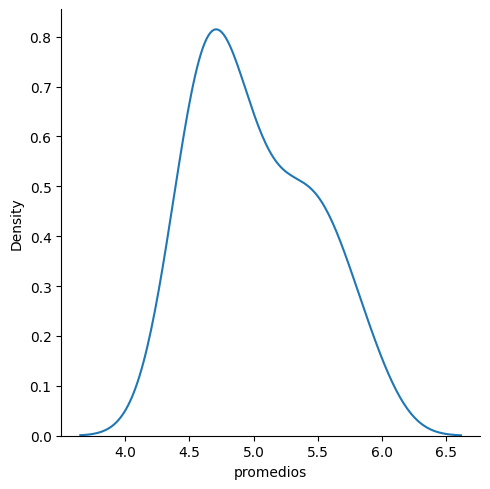

In [ ]:
sns.displot(data=promedio, x="promedios", kind="kde")

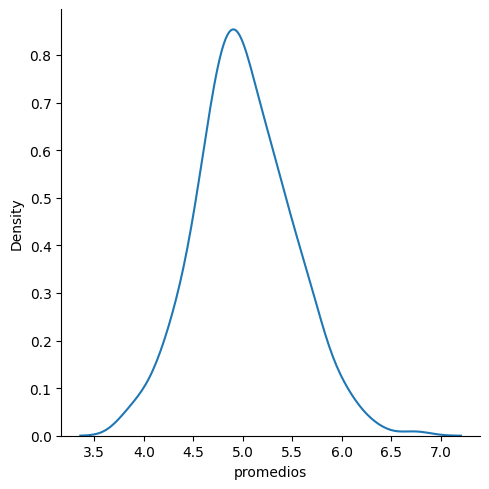

In [ ]:
dias =300
promedios= []
pacientes = 100
for dia in range(dias):
  promedios.append(expon.rvs(size=pacientes, scale=5).mean())
promedio = pd.DataFrame({"dia":range(dias), "promedios":promedios})
promedio
sns.displot(data=promedio, x="promedios", kind="kde")

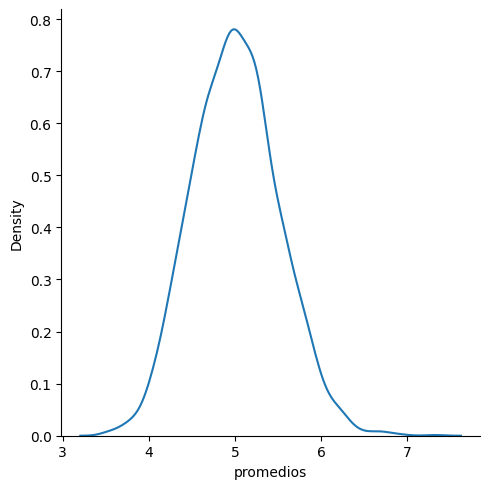

In [ ]:
dias =3000
promedios= []
pacientes = 100
for dia in range(dias):
  promedios.append(expon.rvs(size=pacientes, scale=5).mean())
promedio = pd.DataFrame({"dia":range(dias), "promedios":promedios})
promedio
sns.displot(data=promedio, x="promedios", kind="kde")

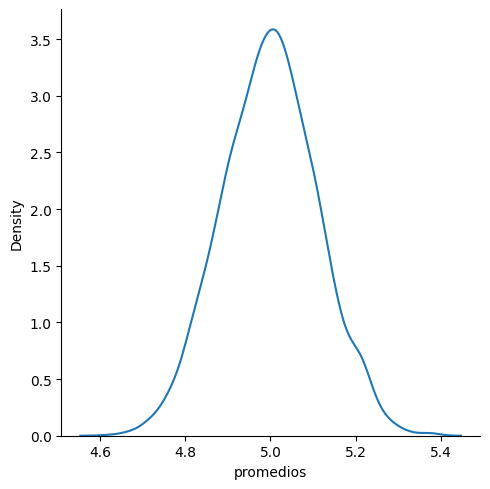

In [ ]:
dias =3000
promedios= []
pacientes = 2000
for dia in range(dias):
  promedios.append(expon.rvs(size=pacientes, scale=5).mean())
promedio = pd.DataFrame({"dia":range(dias), "promedios":promedios})
promedio
sns.displot(data=promedio, x="promedios", kind="kde")

### Teorema del límite central

Sea $X_1, \cdots, X_i, \cdots, X_n$ mediciones independientes de la misma variable aleatorio. Además sí sabemos que:

1. $\mu=E(X_i)$
2. $\sigma^2 = Var(X_i)$

entonces, cuando $n$ es grande
$$\bar{X}=\frac{1}{n}\sum_{i=1}^n X_i \sim N\left(\mu, \frac{\sigma^2}{n}\right)$$



### Taller

1. Realizar el ejercicio del TLC con la distribución asignada en la tarea.
2. Mostrar el histograma del promedio de muchos datos de su distribución.

In [ ]:
masas = [54, 56, 71, 80, 70,78,59, 74, 63, 72, 60, 95, 84, 83]
len(masas)

14

In [ ]:
np.mean(masas)

71.35714285714286

In [ ]:
np.std(masas)

11.561062376153245

In [ ]:
np.std(masas)/np.sqrt(14)

3.0898238884777203

In [ ]:
np.var(masas)

133.65816326530611

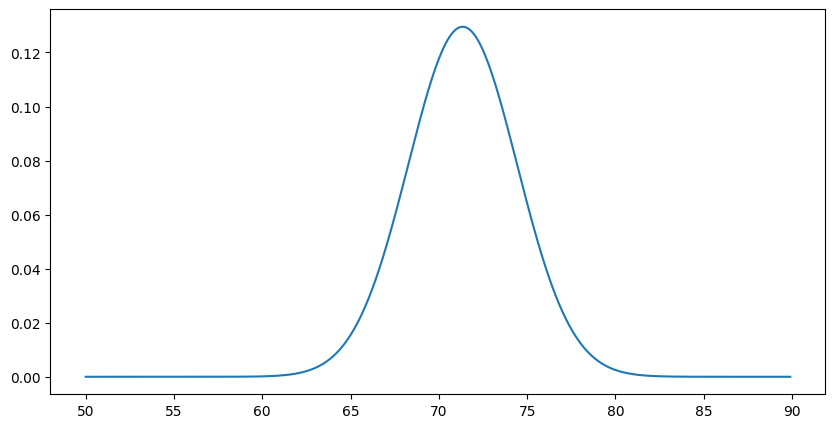

In [ ]:
from scipy.stats import norm
x = np.arange(50, 90, 0.1)

y1 = norm.pdf(x, 71.35, 3.08)
plt.figure(figsize=(10,5))
plt.plot(x, y1, label="mu=71.35, sigma=3.08" )